## Muhammad Nadeem
## 201980050

In this assignment, you'll apply what you learned in the **Scaling and normalization**.

# Get our environment set up

(Kickstarter is a website where people can ask people to invest in various projects and concept products.)

The next code cell loads in the libraries and dataset we'll be using. 

In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

Let's start by scaling the goals of each campaign, which is how much money they were asking for.  After scaling, all values lie between 0 and 1.

In [2]:
# select the usd_goal_real column
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.75 
Maximum value: 20000000.0
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000077
1       0.001500
2       0.002250
3       0.000250
4       0.000975
Minimum value: 0.0 
Maximum value: 1.0


# 1) Practice scaling

We just scaled the "usd_goal_real" column. What about the "goal" column?

Begin by running the code cell below to create a DataFrame `original_goal_data` containing the "goal" column.

In [3]:
# select the usd_goal_real column
original_goal_data = pd.DataFrame(kickstarters_2017.goal)

Use `original_goal_data` to create a new DataFrame `scaled_goal_data` with values scaled between 0 and 1. You must use the `minmax_scaling()` function.

In [4]:
# TODO: Your code here
scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])


In [5]:
scaled_goal_data

,goal
0,0.000025
1,0.000750
2,0.001125
3,0.000125
4,0.000487
...,...
13634,0.000050
13635,0.000002
13636,0.001250
13637,0.000750


# 2) Practice normalization

Now you'll practice normalization. We begin by normalizing the amount of money pledged to each campaign.

In [10]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)

print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.52 
Maximum value: 8596474.58
______________________________

Normalized data
Preview:
 1    10.049349
2     6.418696
3     0.000000
4     9.034302
5    15.578424
Name: usd_pledged_real, dtype: float64
Minimum value: -0.6406912845628095 
Maximum value: 27.466570734057772


The values have changed significantly with normalization!

In the next code cell, you'll take a look at the distribution of the normalized data, where it should now resemble a normal distribution.

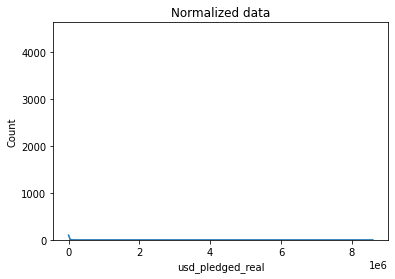

In [11]:
dd = sns.histplot(positive_pledges, kde=True)
dd.set_title("Normalized data")
plt.show()

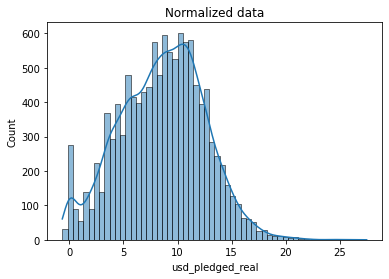

In [7]:
# plot normalized data
ax = sns.histplot(normalized_pledges, kde=True)
ax.set_title("Normalized data")
plt.show()

We used the "usd_pledged_real" column. Follow the same process to normalize the "pledged" column. 

Text(0.5, 1.0, 'Normalized data')

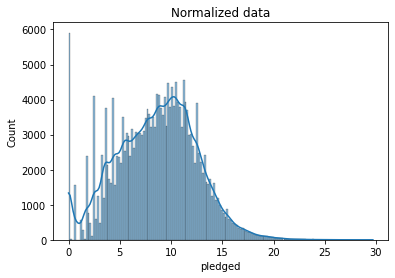

In [ ]:
# TODO: Your code here!
# get the index of all positive pledges (Box-Cox only takes positive values)
index_positive_pledges = kickstarters_2017.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges_only = kickstarters_2017.pledged.loc[index_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_values = pd.Series(stats.boxcox(positive_pledges_only)[0], 
                              name='pledged', index=positive_pledges_only.index)

# plot normalized data
ax = sns.histplot(normalized_values, kde=True)
ax.set_title("Normalized data")